#  Analyse Stratégique des Marchés d'Applications Mobiles
## App Store & Google Play : Identifier les Profils d'Applications Rentables

---

###  Objectif du Projet

En tant que data analyst pour une entreprise de développement d'applications mobiles, notre mission est **d'identifier les profils d'applications les plus rentables** sur les marchés App Store (iOS) et Google Play (Android).

**Modèle économique** : Applications gratuites monétisées par la publicité in-app
-  Téléchargement et installation gratuits
-  Revenus générés par les publicités
-  Succès = Maximiser le nombre d'utilisateurs actifs

**Question centrale** : Quels types d'applications attirent le plus d'utilisateurs ?

---

###  Sources de Données

- **Google Play** : ~10,000 applications Android ([Kaggle Dataset](https://www.kaggle.com/lava18/google-play-store-apps))
- **App Store** : ~7,000 applications iOS ([Kaggle Dataset](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps))


## 1️. Configuration et Import des Bibliothèques

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

%matplotlib inline



## 2️ Chargement et Exploration Initiale des Données

In [28]:
android = pd.read_csv("/kaggle/input/datasets/edehvictor/google-and-apple-store/googleplaystore.csv")
ios = pd.read_csv("/kaggle/input/datasets/edehvictor/google-and-apple-store/AppleStore.csv")

print(f" Données Google Play chargées : {android.shape[0]} applications, {android.shape[1]} variables")
print(f" Données App Store chargées : {ios.shape[0]} applications, {ios.shape[1]} variables")

 Données Google Play chargées : 10841 applications, 13 variables
 Données App Store chargées : 7197 applications, 16 variables


In [29]:
print("=" * 140)
print("GOOGLE PLAY STORE - Aperçu des données")
print("=" * 140)
android.head()

GOOGLE PLAY STORE - Aperçu des données


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.90,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [30]:
print("=" * 140)
print("APP STORE - Aperçu des données")
print("=" * 140)
ios.head()

APP STORE - Aperçu des données


,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,284882215,Facebook,389879808,USD,0.00,2974676,212,3.50,3.50,95.0,4+,Social Networking,37,1,29,1
1,389801252,Instagram,113954816,USD,0.00,2161558,1289,4.50,4.00,10.23,12+,Photo & Video,37,0,29,1
2,529479190,Clash of Clans,116476928,USD,0.00,2130805,579,4.50,4.50,9.24.12,9+,Games,38,5,18,1
3,420009108,Temple Run,65921024,USD,0.00,1724546,3842,4.50,4.00,1.6.2,9+,Games,40,5,1,1
4,284035177,Pandora - Music & Radio,130242560,USD,0.00,1126879,3594,4.00,4.50,8.4.1,12+,Music,37,4,1,1


In [31]:
print("\n STRUCTURE DES DONNÉES GOOGLE PLAY")
print("=" * 80)
android.info()

print("\n STRUCTURE DES DONNÉES APP STORE")
print("=" * 80)
ios.info()


 STRUCTURE DES DONNÉES GOOGLE PLAY
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB

 STRUCTURE DES DONNÉES APP STORE
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total

###  Interprétation de l'Exploration Initiale

**Observations ** :
1. Les datasets contiennent des informations différentes mais complémentaires
2. Présence de valeurs manquantes à traiter (dans le dataset google play)
3. Types de données à convertir (ex: installs, price, size)
4. Nécessité de normaliser certaines colonnes pour la comparaison

## 3. Nettoyage et Préparation des Données

### 3.1 Analyse des Valeurs Manquantes

In [32]:
def analyze_missing_values(df, name):
    print(f"\n ANALYSE DES VALEURS MANQUANTES - {name}")
    print("=" * 80)
    
    missing = df.isnull().sum()
    missing_pct = (missing / len(df)) * 100
    
    missing_df = pd.DataFrame({
        'Colonne': missing.index,
        'Valeurs Manquantes': missing.values,
        'Pourcentage (%)': missing_pct.values
    })
    
    missing_df = missing_df[missing_df['Valeurs Manquantes'] > 0].sort_values('Valeurs Manquantes', ascending=False)
    
    if len(missing_df) > 0:
        print(missing_df.to_string(index=False))
    else:
        print(" Aucune valeur manquante détectée")
    
    return missing_df

missing_android = analyze_missing_values(android, "GOOGLE PLAY")
missing_ios = analyze_missing_values(ios, "APP STORE")


 ANALYSE DES VALEURS MANQUANTES - GOOGLE PLAY
       Colonne  Valeurs Manquantes  Pourcentage (%)
        Rating                1474            13.60
   Current Ver                   8             0.07
   Android Ver                   3             0.03
Content Rating                   1             0.01
          Type                   1             0.01

 ANALYSE DES VALEURS MANQUANTES - APP STORE
 Aucune valeur manquante détectée


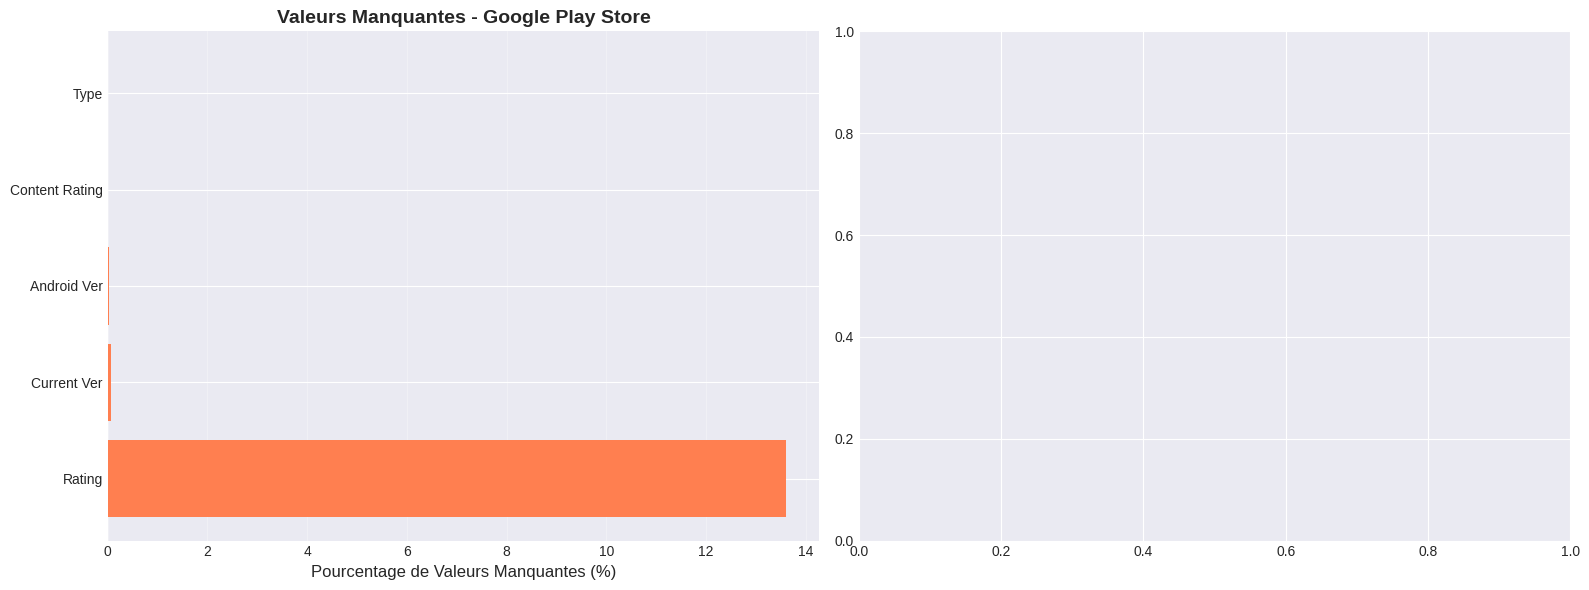

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

if len(missing_android) > 0:
    axes[0].barh(missing_android['Colonne'], missing_android['Pourcentage (%)'], color='coral')
    axes[0].set_xlabel('Pourcentage de Valeurs Manquantes (%)', fontsize=12)
    axes[0].set_title('Valeurs Manquantes - Google Play Store', fontsize=14, fontweight='bold')
    axes[0].grid(axis='x', alpha=0.3)

if len(missing_ios) > 0:
    axes[1].barh(missing_ios['Colonne'], missing_ios['Pourcentage (%)'], color='skyblue')
    axes[1].set_xlabel('Pourcentage de Valeurs Manquantes (%)', fontsize=12)
    axes[1].set_title('Valeurs Manquantes - App Store', fontsize=14, fontweight='bold')
    axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

### 3.2 Détection et Suppression des Doublons

In [34]:
print(" DÉTECTION DES DOUBLONS")
print("=" * 80)

android_duplicates = android.duplicated(subset=['App']).sum()
print(f"Google Play - Doublons détectés : {android_duplicates}")

if android_duplicates > 0:
    print("\nExemples d'applications en double :")
    duplicate_apps = android[android.duplicated(subset=['App'], keep=False)]['App'].unique()[:5]
    for app in duplicate_apps:
        print(f"  - {app}: {android[android['App'] == app].shape[0]} entrées")


ios_duplicates = ios.duplicated(subset=['track_name']).sum()
print(f"\nApp Store - Doublons détectés : {ios_duplicates}")

if ios_duplicates > 0:
    print("\nExemples d'applications en double :")
    duplicate_apps_ios = ios[ios.duplicated(subset=['track_name'], keep=False)]['track_name'].unique()[:5]
    for app in duplicate_apps_ios:
        print(f"  - {app}: {ios[ios['track_name'] == app].shape[0]} entrées")

 DÉTECTION DES DOUBLONS
Google Play - Doublons détectés : 1181

Exemples d'applications en double :
  - Coloring book moana: 2 entrées
  - Mcqueen Coloring pages: 2 entrées
  - UNICORN - Color By Number & Pixel Art Coloring: 2 entrées
  - Textgram - write on photos: 2 entrées
  - Wattpad 📖 Free Books: 2 entrées

App Store - Doublons détectés : 2

Exemples d'applications en double :
  - Mannequin Challenge: 2 entrées
  - VR Roller Coaster: 2 entrées


In [35]:
# Stratégie : Garder l'entrée avec le plus grand nombre d'avis (plus populaire)
print("\n NETTOYAGE DES DOUBLONS")
print("=" * 80)

android_clean = android.sort_values('Reviews', ascending=False).drop_duplicates(subset='App', keep='first')
print(f"Google Play : {len(android)} → {len(android_clean)} applications (après suppression des doublons)")

ios_clean = ios.sort_values('rating_count_tot', ascending=False).drop_duplicates(subset='track_name', keep='first')
print(f"App Store : {len(ios)} → {len(ios_clean)} applications (après suppression des doublons)")


 NETTOYAGE DES DOUBLONS
Google Play : 10841 → 9660 applications (après suppression des doublons)
App Store : 7197 → 7195 applications (après suppression des doublons)


### 3.3 Filtrage : Applications Gratuites en Anglais

In [36]:
def is_english(text):
    """Détermine si une chaîne de caractères est principalement en anglais"""
    if pd.isna(text):
        return False
    
    non_ascii = sum(1 for char in text if ord(char) > 127)
    return non_ascii <= 3 

android_clean['is_english'] = android_clean['App'].apply(is_english)
ios_clean['is_english'] = ios_clean['track_name'].apply(is_english)

print(" FILTRAGE PAR LANGUE")
print("=" * 80)
print(f"Google Play - Applications en anglais : {android_clean['is_english'].sum()} / {len(android_clean)}")
print(f"App Store - Applications en anglais : {ios_clean['is_english'].sum()} / {len(ios_clean)}")

android_clean = android_clean[android_clean['is_english']].copy()
ios_clean = ios_clean[ios_clean['is_english']].copy()

 FILTRAGE PAR LANGUE
Google Play - Applications en anglais : 9615 / 9660
App Store - Applications en anglais : 6181 / 7195


In [37]:
print("\n FILTRAGE DES APPLICATIONS GRATUITES")
print("=" * 80)

android_free_count = (android_clean['Type'] == 'Free').sum()
android_clean = android_clean[android_clean['Type'] == 'Free'].copy()
print(f"Google Play - Applications gratuites : {android_free_count} / {len(android_clean)}")

ios_free_count = (ios_clean['price'] == 0).sum()
ios_clean = ios_clean[ios_clean['price'] == 0].copy()
print(f"App Store - Applications gratuites : {ios_free_count} / {len(ios_clean)}")

print(f"\n Dataset final Google Play : {len(android_clean)} applications")
print(f" Dataset final App Store : {len(ios_clean)} applications")


 FILTRAGE DES APPLICATIONS GRATUITES
Google Play - Applications gratuites : 8861 / 8861
App Store - Applications gratuites : 3220 / 3220

 Dataset final Google Play : 8861 applications
 Dataset final App Store : 3220 applications


## 4️. Analyse Exploratoire Approfondie

### 4.1 Distribution des Catégories/Genres

In [38]:
print(" DISTRIBUTION DES CATÉGORIES")
print("=" * 80)

android_categories = android_clean['Category'].value_counts()
print(f"\nGoogle Play - Top 10 Catégories :")
print(android_categories.head(10).to_string())

ios_genres = ios_clean['prime_genre'].value_counts()
print(f"\nApp Store - Top 10 Genres :")
print(ios_genres.head(10).to_string())

 DISTRIBUTION DES CATÉGORIES

Google Play - Top 10 Catégories :
Category
FAMILY             1679
GAME                858
TOOLS               749
BUSINESS            407
LIFESTYLE           346
PRODUCTIVITY        345
FINANCE             328
MEDICAL             312
SPORTS              301
PERSONALIZATION     294

App Store - Top 10 Genres :
prime_genre
Games                1872
Entertainment         254
Photo & Video         160
Education             118
Social Networking     106
Shopping               84
Utilities              81
Sports                 69
Music                  66
Health & Fitness       65


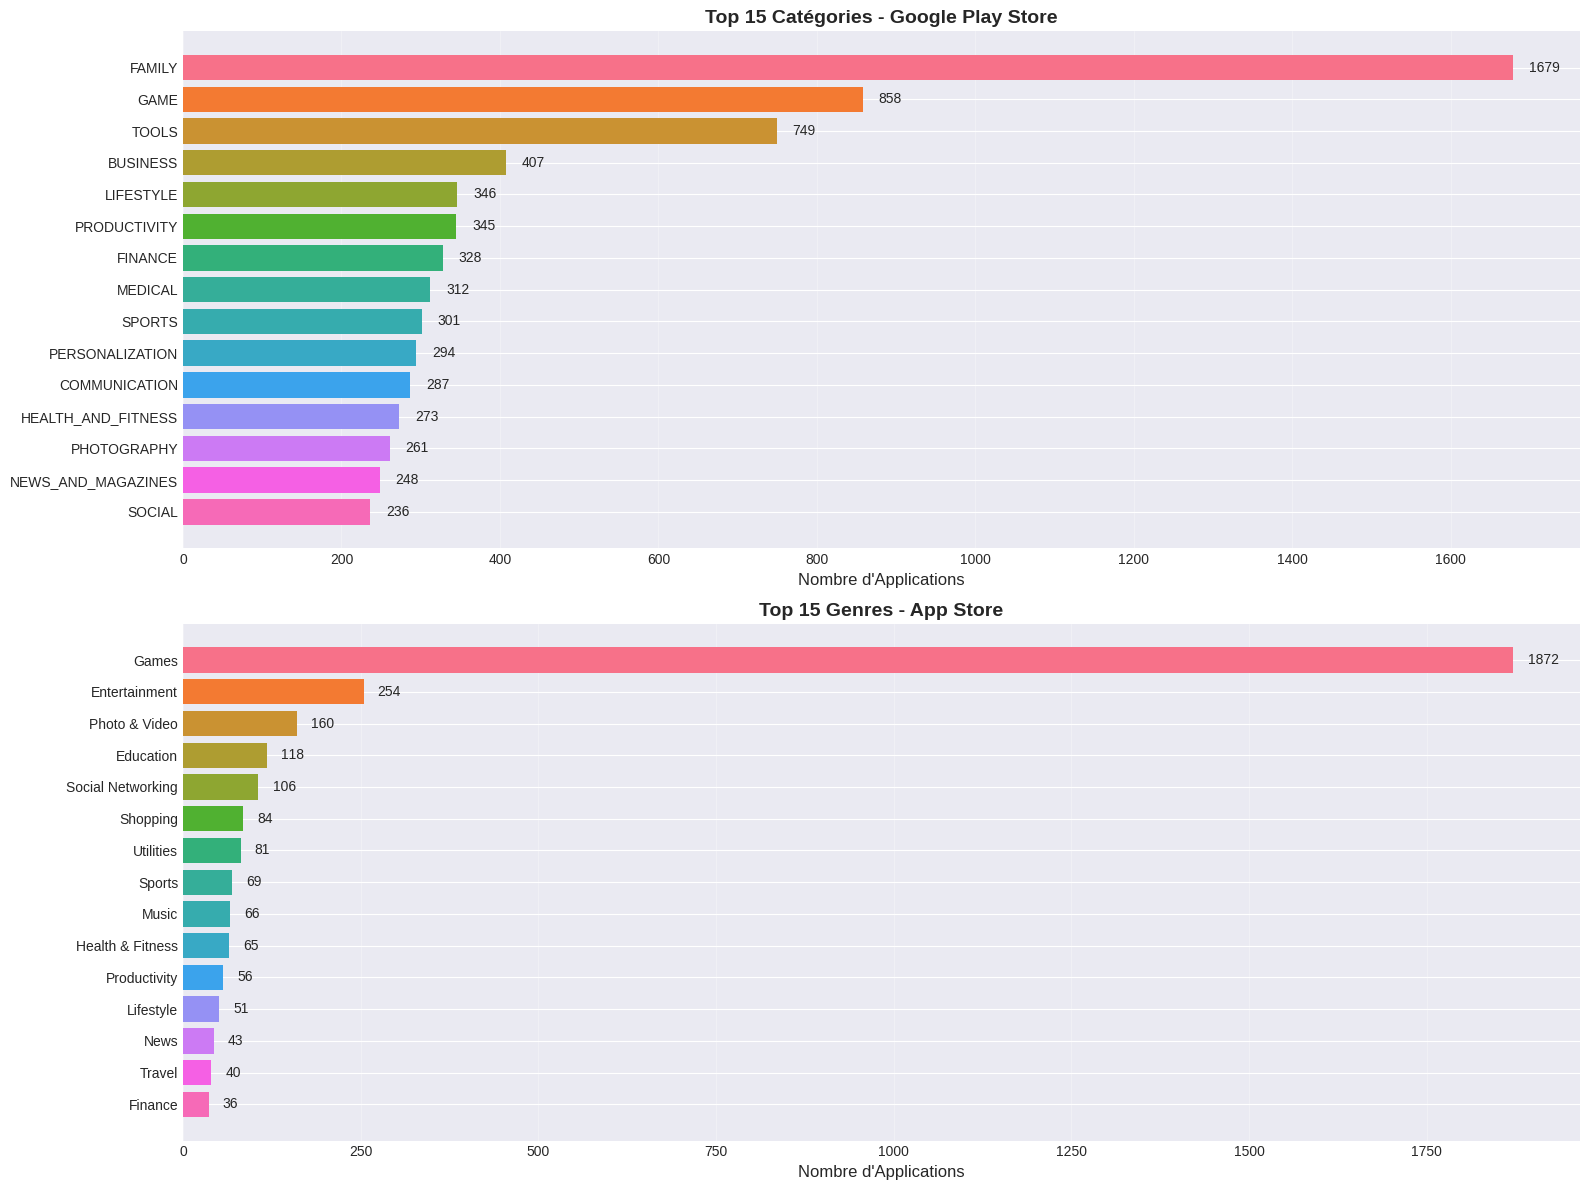

In [39]:
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# Google Play - Top 15
top_android = android_categories.head(15)
colors_android = sns.color_palette("husl", len(top_android))
axes[0].barh(range(len(top_android)), top_android.values, color=colors_android)
axes[0].set_yticks(range(len(top_android)))
axes[0].set_yticklabels(top_android.index)
axes[0].set_xlabel('Nombre d\'Applications', fontsize=12)
axes[0].set_title('Top 15 Catégories - Google Play Store', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

for i, v in enumerate(top_android.values):
    axes[0].text(v + 20, i, str(v), va='center', fontsize=10)

# App Store - Top 15
top_ios = ios_genres.head(15)
colors_ios = sns.color_palette("husl", len(top_ios))
axes[1].barh(range(len(top_ios)), top_ios.values, color=colors_ios)
axes[1].set_yticks(range(len(top_ios)))
axes[1].set_yticklabels(top_ios.index)
axes[1].set_xlabel('Nombre d\'Applications', fontsize=12)
axes[1].set_title('Top 15 Genres - App Store', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

for i, v in enumerate(top_ios.values):
    axes[1].text(v + 20, i, str(v), va='center', fontsize=10)

plt.tight_layout()
plt.show()

### 4.2 Analyse des Notes et Évaluations

In [40]:
android_clean['Rating'] = pd.to_numeric(android_clean['Rating'], errors='coerce')

print(" STATISTIQUES DES NOTES")
print("=" * 80)
print("\nGoogle Play :")
print(android_clean['Rating'].describe())

print("\nApp Store :")
print(ios_clean['user_rating'].describe())

 STATISTIQUES DES NOTES

Google Play :
count   7564.00
mean       4.17
std        0.53
min        1.00
25%        4.00
50%        4.30
75%        4.50
max        5.00
Name: Rating, dtype: float64

App Store :
count   3220.00
mean       3.87
std        1.09
min        0.00
25%        3.50
50%        4.00
75%        4.50
max        5.00
Name: user_rating, dtype: float64


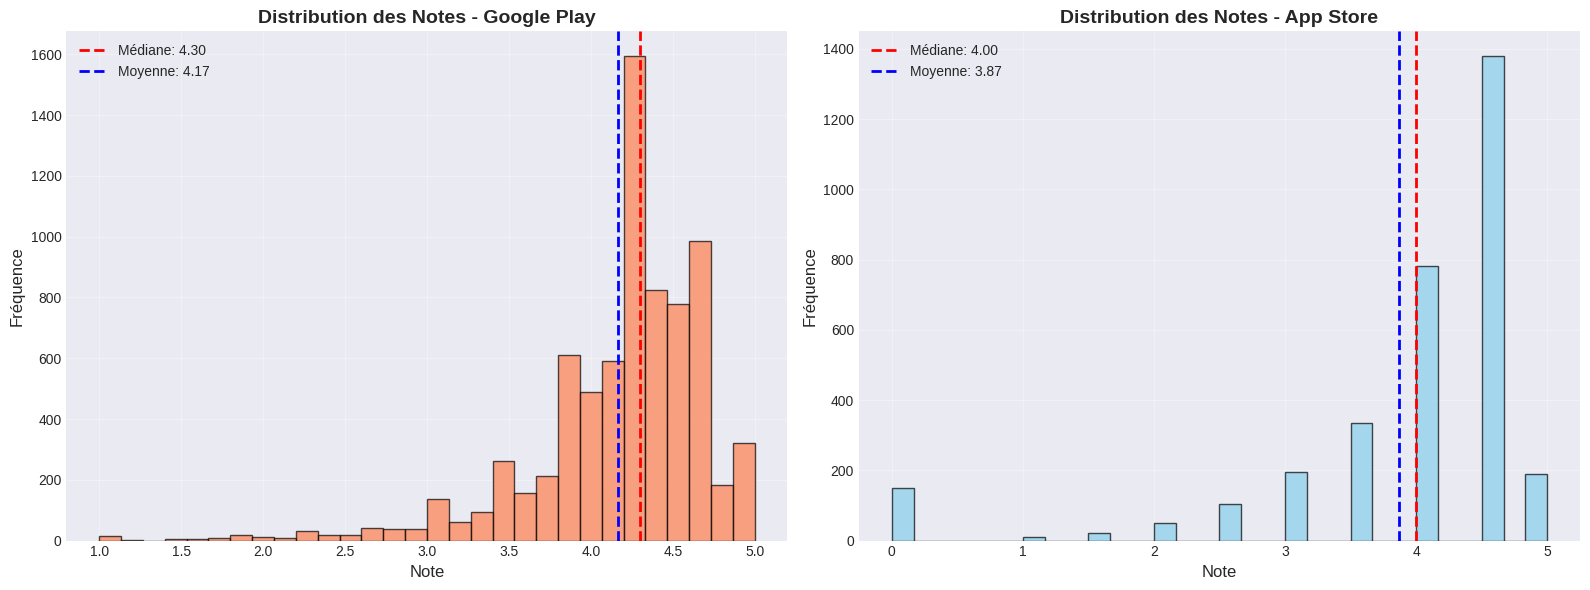

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Google Play
axes[0].hist(android_clean['Rating'].dropna(), bins=30, color='coral', edgecolor='black', alpha=0.7)
axes[0].axvline(android_clean['Rating'].median(), color='red', linestyle='--', linewidth=2, label=f'Médiane: {android_clean["Rating"].median():.2f}')
axes[0].axvline(android_clean['Rating'].mean(), color='blue', linestyle='--', linewidth=2, label=f'Moyenne: {android_clean["Rating"].mean():.2f}')
axes[0].set_xlabel('Note', fontsize=12)
axes[0].set_ylabel('Fréquence', fontsize=12)
axes[0].set_title('Distribution des Notes - Google Play', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# App Store
axes[1].hist(ios_clean['user_rating'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[1].axvline(ios_clean['user_rating'].median(), color='red', linestyle='--', linewidth=2, label=f'Médiane: {ios_clean["user_rating"].median():.2f}')
axes[1].axvline(ios_clean['user_rating'].mean(), color='blue', linestyle='--', linewidth=2, label=f'Moyenne: {ios_clean["user_rating"].mean():.2f}')
axes[1].set_xlabel('Note', fontsize=12)
axes[1].set_ylabel('Fréquence', fontsize=12)
axes[1].set_title('Distribution des Notes - App Store', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### 4.3 Analyse de la Popularité par Catégorie

In [42]:
def convert_installs(installs):
    """Convertit le format '1,000,000+' en nombre"""
    if pd.isna(installs):
        return np.nan
    return int(installs.replace('+', '').replace(',', ''))

android_clean['Installs_num'] = android_clean['Installs'].apply(convert_installs)

android_installs_by_category = android_clean.groupby('Category')['Installs_num'].mean().sort_values(ascending=False)
ios_ratings_by_genre = ios_clean.groupby('prime_genre')['rating_count_tot'].mean().sort_values(ascending=False)

print(" POPULARITÉ MOYENNE PAR CATÉGORIE/GENRE")
print("=" * 80)
print("\nGoogle Play - Top 10 (Installations moyennes) :")
print(android_installs_by_category.head(10).to_string())

print("\nApp Store - Top 10 (Nombre moyen d'évaluations) :")
print(ios_ratings_by_genre.head(10).to_string())

 POPULARITÉ MOYENNE PAR CATÉGORIE/GENRE

Google Play - Top 10 (Installations moyennes) :
Category
COMMUNICATION        38456119.17
VIDEO_PLAYERS        24727872.45
SOCIAL               23253652.13
PHOTOGRAPHY          17805627.64
PRODUCTIVITY         16787331.34
GAME                 15567446.91
TRAVEL_AND_LOCAL     13984077.71
ENTERTAINMENT        11640705.88
TOOLS                10682301.03
NEWS_AND_MAGAZINES    9549178.47

App Store - Top 10 (Nombre moyen d'évaluations) :
prime_genre
Navigation          86090.33
Reference           74942.11
Social Networking   71548.35
Music               57326.53
Weather             52279.89
Book                39758.50
Food & Drink        33333.92
Finance             31467.94
Photo & Video       28441.54
Travel              28243.80


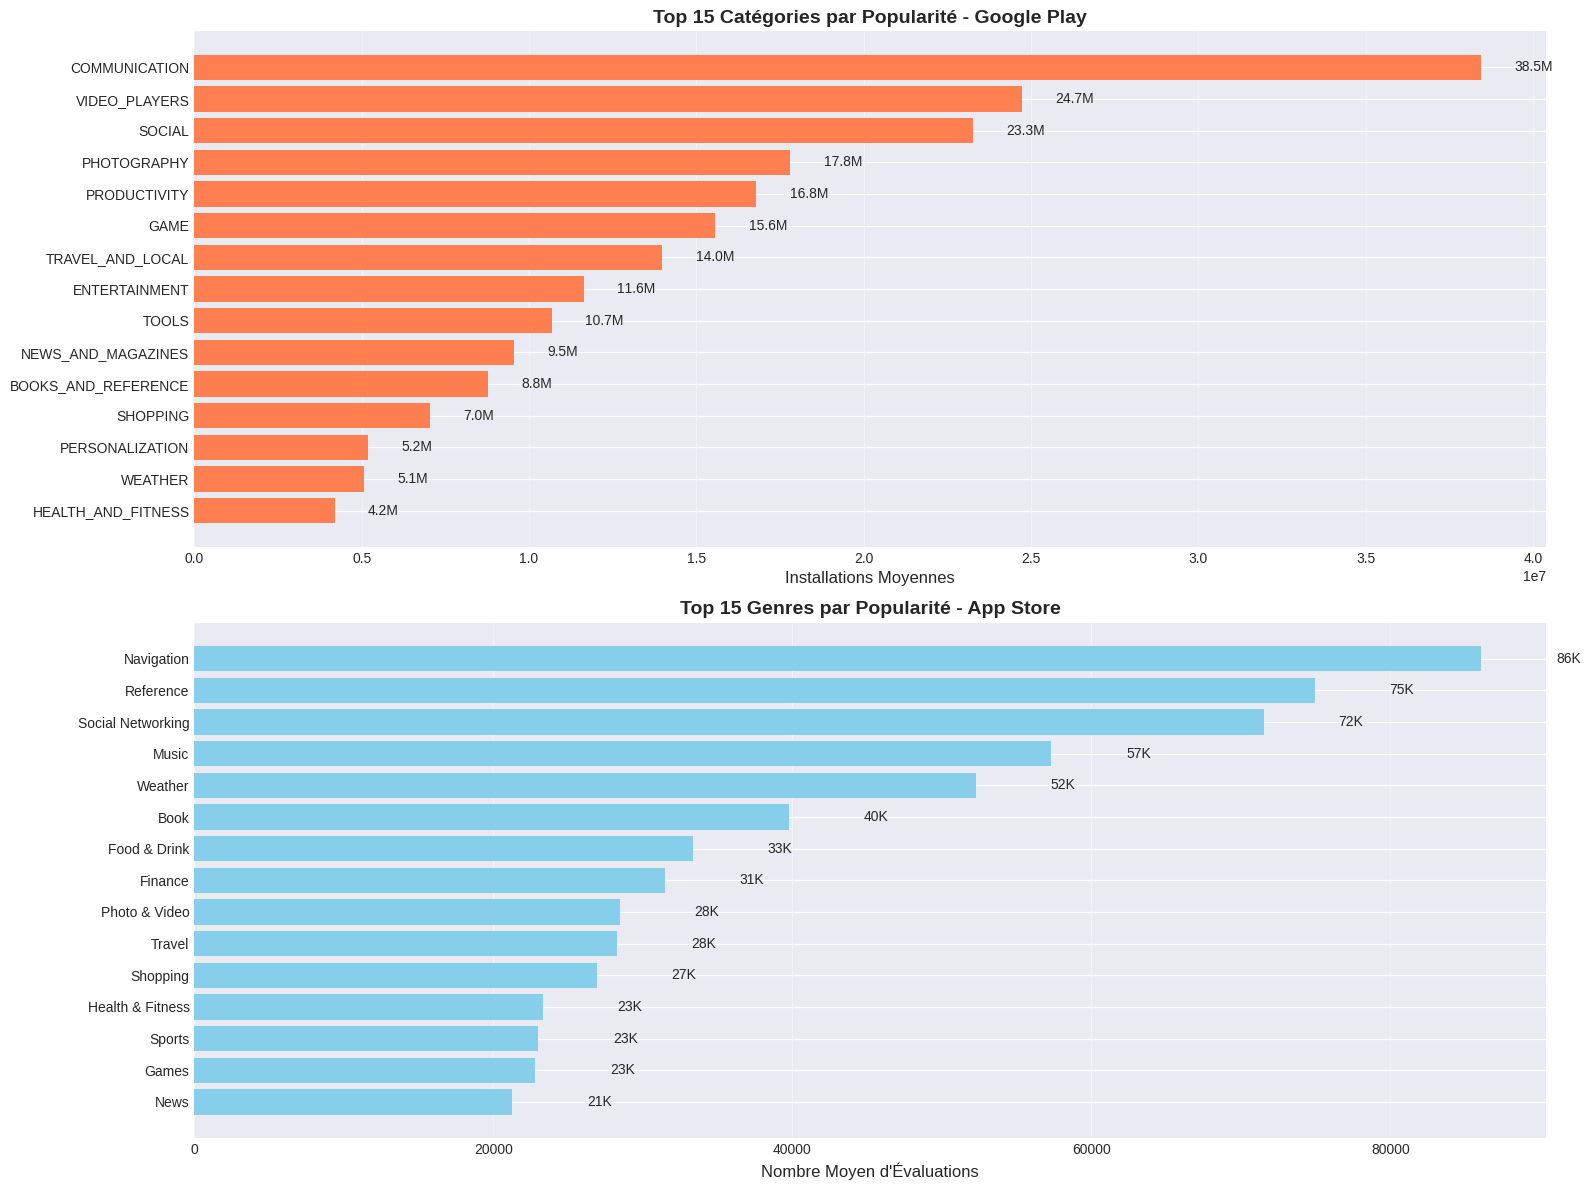

In [43]:
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# Google Play
top_android_pop = android_installs_by_category.head(15)
axes[0].barh(range(len(top_android_pop)), top_android_pop.values, color='coral')
axes[0].set_yticks(range(len(top_android_pop)))
axes[0].set_yticklabels(top_android_pop.index)
axes[0].set_xlabel('Installations Moyennes', fontsize=12)
axes[0].set_title('Top 15 Catégories par Popularité - Google Play', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

for i, v in enumerate(top_android_pop.values):
    axes[0].text(v + 1000000, i, f'{v/1000000:.1f}M', va='center', fontsize=10)

# App Store
top_ios_pop = ios_ratings_by_genre.head(15)
axes[1].barh(range(len(top_ios_pop)), top_ios_pop.values, color='skyblue')
axes[1].set_yticks(range(len(top_ios_pop)))
axes[1].set_yticklabels(top_ios_pop.index)
axes[1].set_xlabel('Nombre Moyen d\'Évaluations', fontsize=12)
axes[1].set_title('Top 15 Genres par Popularité - App Store', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

for i, v in enumerate(top_ios_pop.values):
    axes[1].text(v + 5000, i, f'{v/1000:.0f}K', va='center', fontsize=10)

plt.tight_layout()
plt.show()

###  Interprétation de l'Analyse de Popularité


* **Communication** domine sur Google Play avec le plus d'installations moyennes
* **Navigation** domine sur App Store
* **Réseaux sociaux** très populaire sur les deux plateformes


### 4.4 Analyse Comparative : Offre vs Demande

In [44]:
android_comparison = pd.DataFrame({
    'Catégorie': android_categories.index,
    'Nombre_Apps': android_categories.values,
    'Installs_Moyennes': [android_installs_by_category.get(cat, 0) for cat in android_categories.index]
})

android_comparison['Score_Opportunité'] = android_comparison['Installs_Moyennes'] / android_comparison['Nombre_Apps']
android_comparison = android_comparison.sort_values('Score_Opportunité', ascending=False)

print(" ANALYSE D'OPPORTUNITÉ - GOOGLE PLAY")
print("=" * 80)
print("\nTop 10 Catégories avec le meilleur ratio Popularité/Compétition :")
print(android_comparison.head(10).to_string(index=False))

 ANALYSE D'OPPORTUNITÉ - GOOGLE PLAY

Top 10 Catégories avec le meilleur ratio Popularité/Compétition :
          Catégorie  Nombre_Apps  Installs_Moyennes  Score_Opportunité
      VIDEO_PLAYERS          159        24727872.45          155521.21
      ENTERTAINMENT           85        11640705.88          136949.48
      COMMUNICATION          287        38456119.17          133993.45
             SOCIAL          236        23253652.13           98532.42
            WEATHER           71         5074486.20           71471.64
        PHOTOGRAPHY          261        17805627.64           68220.80
   TRAVEL_AND_LOCAL          207        13984077.71           67555.93
       PRODUCTIVITY          345        16787331.34           48658.93
BOOKS_AND_REFERENCE          190         8767811.89           46146.38
 NEWS_AND_MAGAZINES          248         9549178.47           38504.75


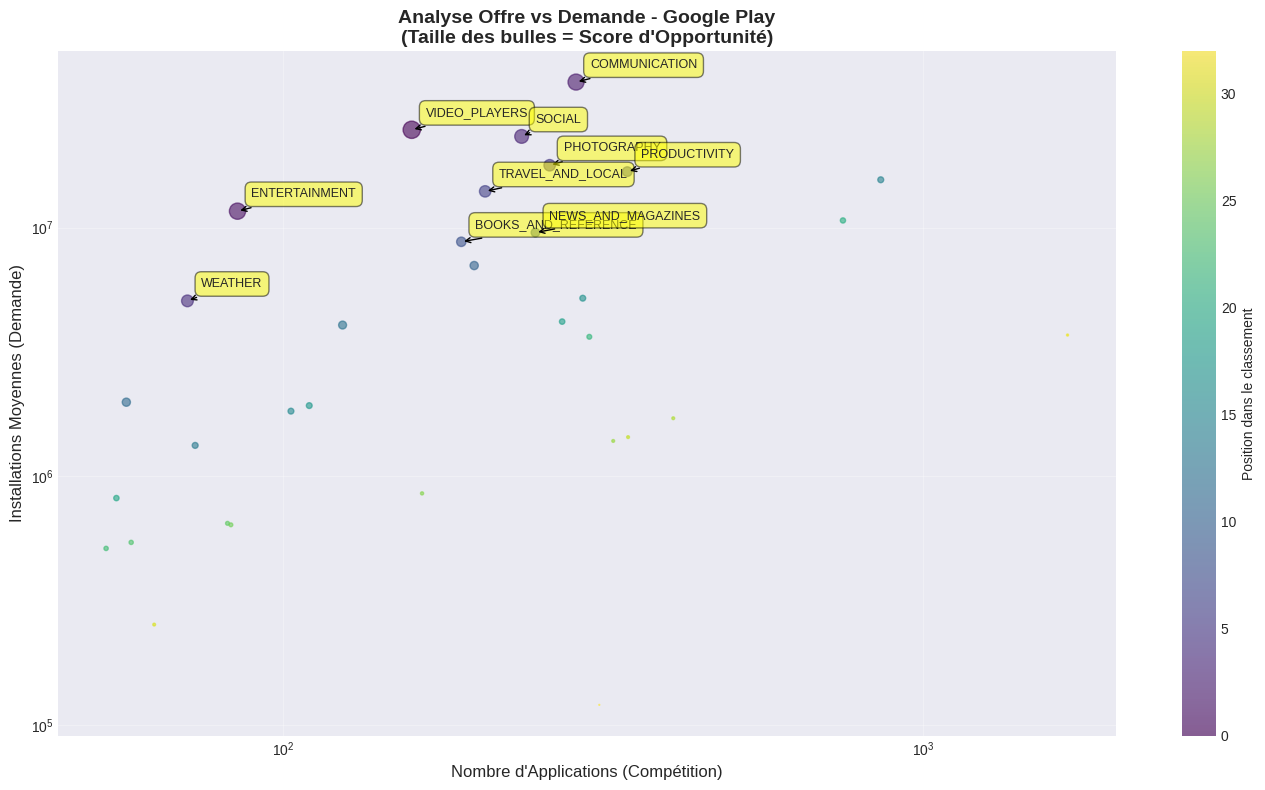

In [45]:
fig, ax = plt.subplots(figsize=(14, 8))

scatter = ax.scatter(android_comparison['Nombre_Apps'], 
                     android_comparison['Installs_Moyennes'],
                     s=android_comparison['Score_Opportunité']/1000,
                     alpha=0.6,
                     c=range(len(android_comparison)),
                     cmap='viridis')

top_opportunities = android_comparison.head(10)
for idx, row in top_opportunities.iterrows():
    ax.annotate(row['Catégorie'], 
                xy=(row['Nombre_Apps'], row['Installs_Moyennes']),
                xytext=(10, 10), 
                textcoords='offset points',
                fontsize=9,
                bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

ax.set_xlabel('Nombre d\'Applications (Compétition)', fontsize=12)
ax.set_ylabel('Installations Moyennes (Demande)', fontsize=12)
ax.set_title('Analyse Offre vs Demande - Google Play\n(Taille des bulles = Score d\'Opportunité)', fontsize=14, fontweight='bold')
ax.grid(alpha=0.3)
ax.set_xscale('log')
ax.set_yscale('log')

plt.colorbar(scatter, label='Position dans le classement')
plt.tight_layout()
plt.show()

## 5️. Analyse Approfondie des Genres Prometteurs

### 5.1 Focus : Catégorie BOOKS_AND_REFERENCE

In [46]:
books_apps = android_clean[android_clean['Category'] == 'BOOKS_AND_REFERENCE'].copy()

print(" ANALYSE DÉTAILLÉE - BOOKS AND REFERENCE")
print("=" * 80)
print(f"Nombre total d'applications : {len(books_apps)}")
print(f"\nInstallations moyennes : {books_apps['Installs_num'].mean():,.0f}")
print(f"Note moyenne : {books_apps['Rating'].mean():.2f}/5")
print(f"\nDistribution des installations :")
print(books_apps['Installs'].value_counts().sort_index(ascending=False).head(10))

 ANALYSE DÉTAILLÉE - BOOKS AND REFERENCE
Nombre total d'applications : 190

Installations moyennes : 8,767,812
Note moyenne : 4.35/5

Distribution des installations :
Installs
500,000+        16
500+             7
50,000+         11
50+              2
5,000,000+       9
5,000+          14
5+               4
100,000,000+     4
100,000+        20
100+             6
Name: count, dtype: int64


In [47]:
books_top = books_apps.nlargest(20, 'Installs_num')[['App', 'Installs', 'Rating', 'Reviews']]

print("\n TOP 20 Applications Books & Reference (par installations) :")
print("=" * 80)
print(books_top.to_string(index=False))


 TOP 20 Applications Books & Reference (par installations) :
                                               App       Installs  Rating Reviews
                                 Google Play Books 1,000,000,000+    3.90 1433233
                                     Amazon Kindle   100,000,000+    4.20  814151
                           Audiobooks from Audible   100,000,000+    4.50  568922
                              Wattpad 📖 Free Books   100,000,000+    4.60 2915189
                                             Bible   100,000,000+    4.70 2440695
                                        JW Library    10,000,000+    4.90  922752
Dictionary.com: Find Definitions for English Words    10,000,000+    4.60  899010
                        Spanish English Translator    10,000,000+    4.20   87919
                                          HTC Help    10,000,000+    4.20    8342
                                         Wikipedia    10,000,000+    4.40  577550
                                 Qur

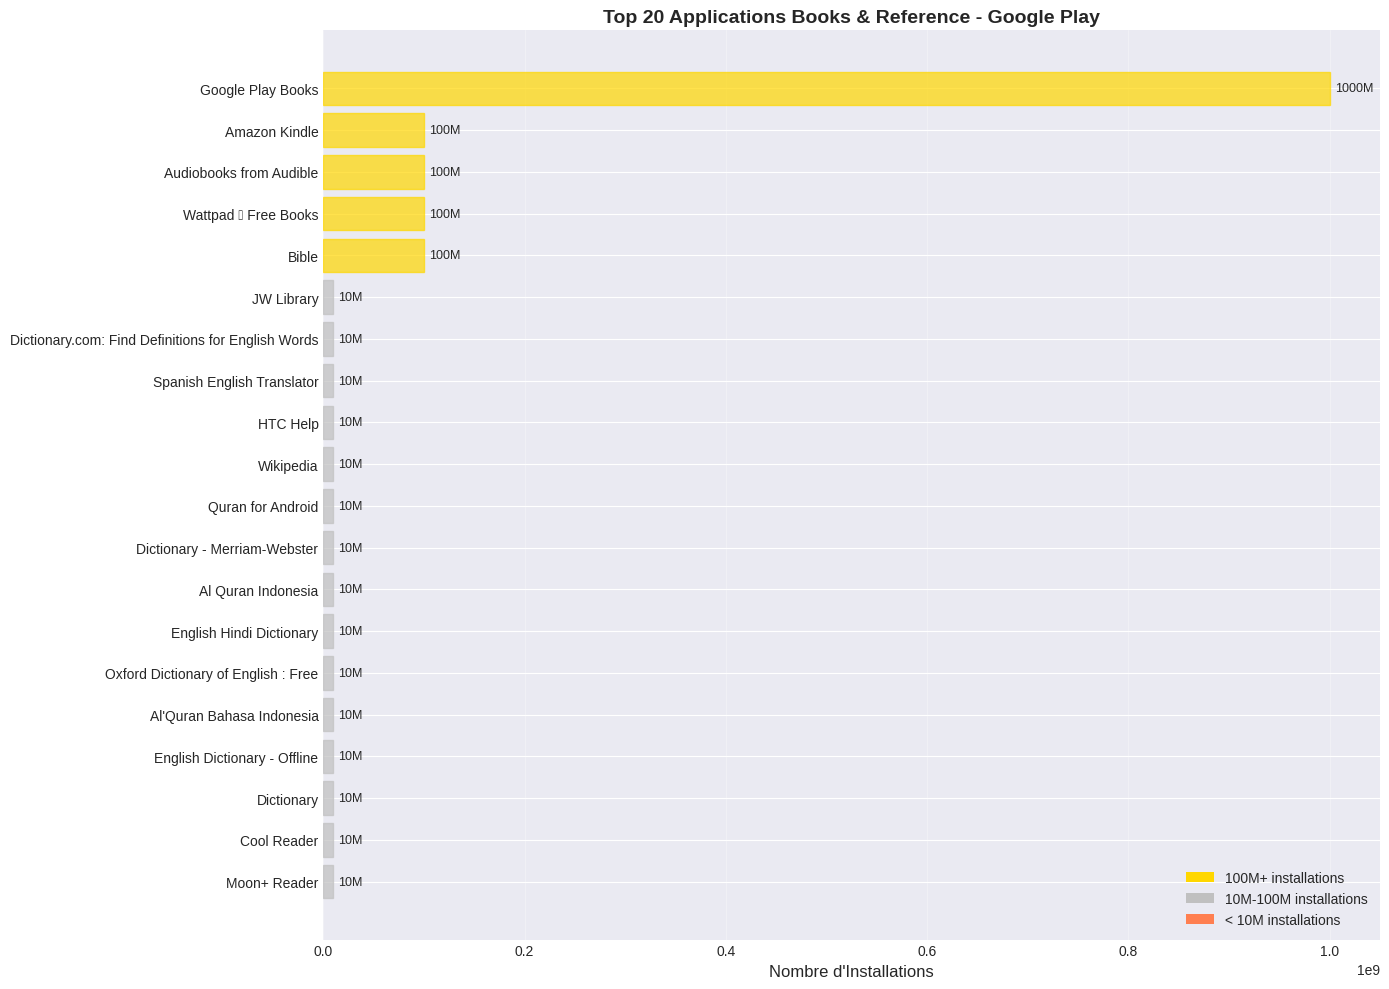

In [48]:
fig, ax = plt.subplots(figsize=(14, 10))

top_20_books = books_apps.nlargest(20, 'Installs_num')
y_pos = range(len(top_20_books))

bars = ax.barh(y_pos, top_20_books['Installs_num'], color='teal', alpha=0.7)

# Colorer différemment selon le niveau de popularité
colors = ['gold' if x >= 100000000 else 'silver' if x >= 10000000 else 'coral' 
          for x in top_20_books['Installs_num']]
for bar, color in zip(bars, colors):
    bar.set_color(color)

ax.set_yticks(y_pos)
ax.set_yticklabels(top_20_books['App'], fontsize=10)
ax.set_xlabel('Nombre d\'Installations', fontsize=12)
ax.set_title('Top 20 Applications Books & Reference - Google Play', fontsize=14, fontweight='bold')
ax.invert_yaxis()
ax.grid(axis='x', alpha=0.3)

# Ajouter des annotations
for i, v in enumerate(top_20_books['Installs_num']):
    label = f'{v/1000000:.0f}M' if v >= 1000000 else f'{v/1000:.0f}K'
    ax.text(v + 5000000, i, label, va='center', fontsize=9)

# Légende
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='gold', label='100M+ installations'),
                   Patch(facecolor='silver', label='10M-100M installations'),
                   Patch(facecolor='coral', label='< 10M installations')]
ax.legend(handles=legend_elements, loc='lower right')

plt.tight_layout()
plt.show()

### 5.2 Analyse des Sous-Segments

In [49]:
print(" IDENTIFICATION DES SOUS-SEGMENTS - Books & Reference")
print("=" * 80)

mega_apps = books_apps[books_apps['Installs_num'] >= 100000000]
popular_apps = books_apps[(books_apps['Installs_num'] >= 1000000) & (books_apps['Installs_num'] < 100000000)]
niche_apps = books_apps[books_apps['Installs_num'] < 1000000]

print(f"\n Segmentation par popularité :")
print(f"  - Applications ultra-populaires (100M+) : {len(mega_apps)}")
print(f"  - Applications populaires (1M-100M) : {len(popular_apps)}")
print(f"  - Applications de niche (<1M) : {len(niche_apps)}")

print(f"\n Applications ultra-populaires :")
for app in mega_apps['App'].values:
    print(f"  - {app}")

print(f"\n Exemples d'applications populaires (segment cible) :")
sample_popular = popular_apps.nlargest(10, 'Installs_num')['App'].values
for app in sample_popular:
    print(f"  - {app}")

 IDENTIFICATION DES SOUS-SEGMENTS - Books & Reference

 Segmentation par popularité :
  - Applications ultra-populaires (100M+) : 5
  - Applications populaires (1M-100M) : 48
  - Applications de niche (<1M) : 137

 Applications ultra-populaires :
  - Amazon Kindle
  - Audiobooks from Audible
  - Wattpad 📖 Free Books
  - Bible
  - Google Play Books

 Exemples d'applications populaires (segment cible) :
  - JW Library
  - Dictionary.com: Find Definitions for English Words
  - Spanish English Translator
  - HTC Help
  - Wikipedia
  - Quran for Android
  - Dictionary - Merriam-Webster
  - Al Quran Indonesia
  - English Hindi Dictionary
  - Oxford Dictionary of English : Free


## 6️. Recommandations 

### 6.1 Synthèse des Insights

In [50]:
print(" SYNTHÈSE DES OPPORTUNITÉS DE MARCHÉ")
print("=" * 80)

# Google Play - Top 5 opportunités
print("\n GOOGLE PLAY - Top 5 Catégories à Fort Potentiel :")
print("-" * 80)
top_5_android = android_comparison.head(5)
for idx, row in top_5_android.iterrows():
    print(f"\n{row['Catégorie']}")
    print(f"   Applications : {row['Nombre_Apps']:,.0f}")
    print(f"   Installations moyennes : {row['Installs_Moyennes']:,.0f}")
    print(f"   Score d'opportunité : {row['Score_Opportunité']:,.0f}")

# App Store - Top 5 genres
ios_comparison = pd.DataFrame({
    'Genre': ios_genres.index,
    'Nombre_Apps': ios_genres.values,
    'Ratings_Moyennes': [ios_ratings_by_genre.get(genre, 0) for genre in ios_genres.index]
})
ios_comparison['Score_Opportunité'] = ios_comparison['Ratings_Moyennes'] / ios_comparison['Nombre_Apps']
ios_comparison = ios_comparison.sort_values('Score_Opportunité', ascending=False)

print("\n APP STORE - Top 5 Genres à Fort Potentiel :")
print("-" * 80)
top_5_ios = ios_comparison.head(5)
for idx, row in top_5_ios.iterrows():
    print(f"\n{row['Genre']}")
    print(f"   Applications : {row['Nombre_Apps']:,.0f}")
    print(f"   Évaluations moyennes : {row['Ratings_Moyennes']:,.0f}")
    print(f"   Score d'opportunité : {row['Score_Opportunité']:,.2f}")

 SYNTHÈSE DES OPPORTUNITÉS DE MARCHÉ

 GOOGLE PLAY - Top 5 Catégories à Fort Potentiel :
--------------------------------------------------------------------------------

VIDEO_PLAYERS
   Applications : 159
   Installations moyennes : 24,727,872
   Score d'opportunité : 155,521

ENTERTAINMENT
   Applications : 85
   Installations moyennes : 11,640,706
   Score d'opportunité : 136,949

COMMUNICATION
   Applications : 287
   Installations moyennes : 38,456,119
   Score d'opportunité : 133,993

SOCIAL
   Applications : 236
   Installations moyennes : 23,253,652
   Score d'opportunité : 98,532

WEATHER
   Applications : 71
   Installations moyennes : 5,074,486
   Score d'opportunité : 71,472

 APP STORE - Top 5 Genres à Fort Potentiel :
--------------------------------------------------------------------------------

Navigation
   Applications : 6
   Évaluations moyennes : 86,090
   Score d'opportunité : 14,348.39

Reference
   Applications : 18
   Évaluations moyennes : 74,942
   Score d'

## 7️. Dashboard Récapitulatif

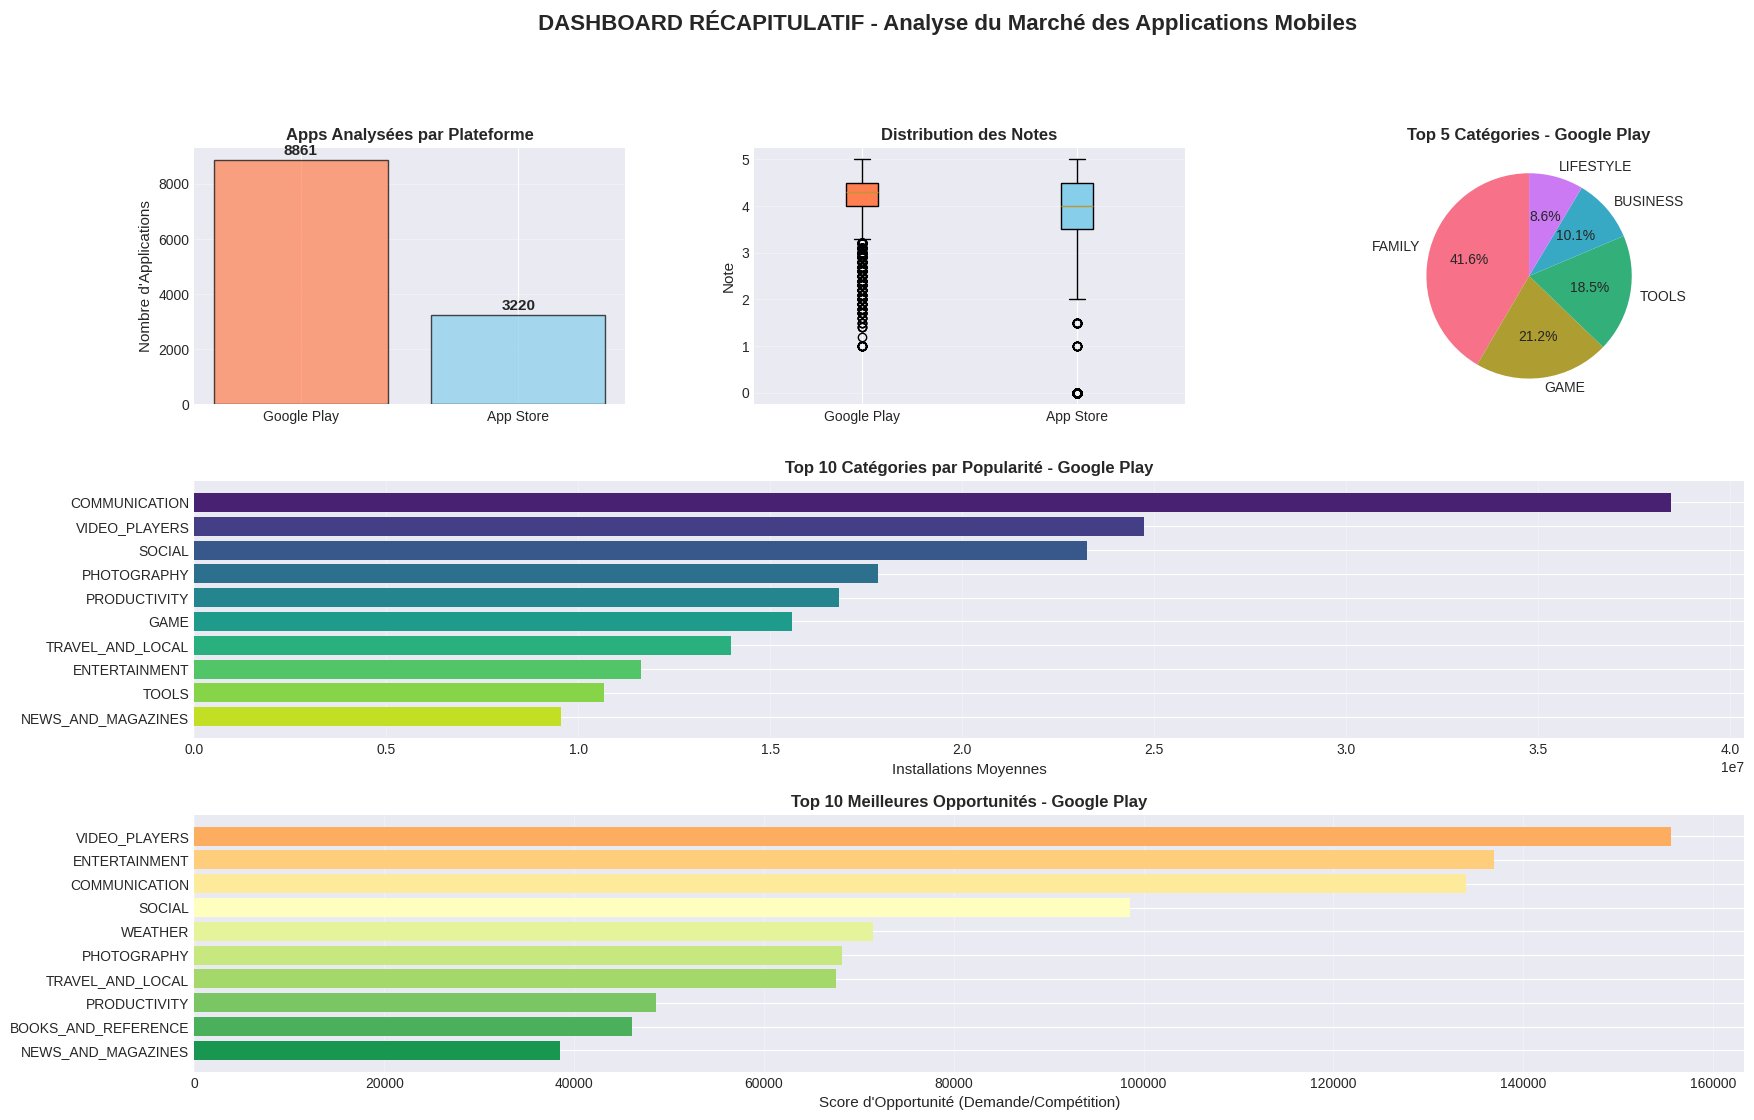

In [52]:
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

ax1 = fig.add_subplot(gs[0, 0])
platforms = ['Google Play', 'App Store']
app_counts = [len(android_clean), len(ios_clean)]
ax1.bar(platforms, app_counts, color=['coral', 'skyblue'], alpha=0.7, edgecolor='black')
ax1.set_ylabel('Nombre d\'Applications', fontsize=11)
ax1.set_title('Apps Analysées par Plateforme', fontsize=12, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)
for i, v in enumerate(app_counts):
    ax1.text(i, v + 200, str(v), ha='center', fontsize=11, fontweight='bold')

# Distribution des notes moyennes
ax2 = fig.add_subplot(gs[0, 1])
ratings_data = [android_clean['Rating'].dropna(), ios_clean['user_rating']]
bp = ax2.boxplot(ratings_data, labels=['Google Play', 'App Store'], patch_artist=True)
bp['boxes'][0].set_facecolor('coral')
bp['boxes'][1].set_facecolor('skyblue')
ax2.set_ylabel('Note', fontsize=11)
ax2.set_title('Distribution des Notes', fontsize=12, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

# Top 5 catégories - Google Play
ax3 = fig.add_subplot(gs[0, 2])
top_5_cat = android_categories.head(5)
ax3.pie(top_5_cat, labels=top_5_cat.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("husl", 5))
ax3.set_title('Top 5 Catégories - Google Play', fontsize=12, fontweight='bold')

# Installations par catégorie (Top 10)
ax4 = fig.add_subplot(gs[1, :])
top_10_installs = android_installs_by_category.head(10)
ax4.barh(range(len(top_10_installs)), top_10_installs.values, color=sns.color_palette("viridis", 10))
ax4.set_yticks(range(len(top_10_installs)))
ax4.set_yticklabels(top_10_installs.index, fontsize=10)
ax4.set_xlabel('Installations Moyennes', fontsize=11)
ax4.set_title('Top 10 Catégories par Popularité - Google Play', fontsize=12, fontweight='bold')
ax4.invert_yaxis()
ax4.grid(axis='x', alpha=0.3)

# Score d'opportunité (Top 10)
ax5 = fig.add_subplot(gs[2, :])
top_10_opp = android_comparison.head(10)
colors_gradient = plt.cm.RdYlGn(np.linspace(0.3, 0.9, 10))
ax5.barh(range(len(top_10_opp)), top_10_opp['Score_Opportunité'], color=colors_gradient)
ax5.set_yticks(range(len(top_10_opp)))
ax5.set_yticklabels(top_10_opp['Catégorie'], fontsize=10)
ax5.set_xlabel('Score d\'Opportunité (Demande/Compétition)', fontsize=11)
ax5.set_title('Top 10 Meilleures Opportunités - Google Play', fontsize=12, fontweight='bold')
ax5.invert_yaxis()
ax5.grid(axis='x', alpha=0.3)

fig.suptitle(' DASHBOARD RÉCAPITULATIF - Analyse du Marché des Applications Mobiles', 
             fontsize=16, fontweight='bold', y=0.995)

plt.show()

## 8️. Conclusion 

L’analyse du marché des applications mobiles met en évidence des tendances stratégiques claires sur les deux principales plateformes, Google Play et App Store. 
Sur Google Play, les catégories **FAMILY**, **GAME** et **TOOLS** dominent, tandis que sur l’App Store, les segments **Games**, **Entertainment** et **Photo** & **Video** arrivent en tête, révélant une convergence forte autour du divertissement et des outils du quotidien. 

L’étude de la dynamique offre/demande montre que les applications de communication et de réseaux sociaux bénéficient d’une demande très élevée mais d’une forte saturation, alors que la catégorie Books & Reference présente une demande soutenue avec une concurrence plus modérée, ouvrant la voie à une opportunité  dans les applications éducatives et culturelles enrichies. Les facteurs clés de succès identifiés incluent l’utilité pratique quotidienne (favorisant la rétention), la gamification (stimulant l’engagement) et la dimension communautaire (renforçant la viralité). 

Dans ce contexte, la recommandation principale consiste à développer une application interactive autour d’un livre populaire intégrant du contenu de qualité (texte et audio), des fonctionnalités d’engagement (quiz, badges), une communauté active (forums, partage) et une monétisation par publicité in-app, avec un potentiel estimé de 500 000 à 1 million d’utilisateurs en 6 à 12 mois et des revenus publicitaires projetés entre 100 000 et 250 000 dollars par mois.